In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_curve

In [3]:
data = pd.read_csv('athletes.csv')
data.head(20)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
5,173071782,Aaron Royle,AUS,male,1/26/90,1.80,67.0,triathlon,0,0,0
6,266237702,Aaron Russell,USA,male,6/4/93,2.05,98.0,volleyball,0,0,1
7,382571888,Aaron Younger,AUS,male,9/25/91,1.93,100.0,aquatics,0,0,0
8,87689776,Aauri Lorena Bokesa,ESP,female,12/14/88,1.80,62.0,athletics,0,0,0
9,997877719,Ababel Yeshaneh,ETH,female,7/22/91,1.65,54.0,athletics,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [18]:
data[ pd.isnull( data['height'] ) ].head()
data['height'] = data['height'].fillna(data['height'].mean())
data['weight'] = data['weight'].fillna(data['weight'].mean())
data['dob'] = data['dob'].fillna('6/17/80')

In [19]:
print('Для height пустых строк ' + str( len( data[ pd.isnull( data['height'] ) ] ) ))
print('Для weight пустых строк ' + str( len( data[ pd.isnull( data['weight'] ) ] ) ))
print('Для sport пустых строк ' + str( len( data[ pd.isnull( data['sport'] ) ] ) ))
print('Всего строк в наборе ' + str( len( data ) ))

Для height пустых строк 0
Для weight пустых строк 0
Для sport пустых строк 0
Всего строк в наборе 10858


In [20]:
data['height'].unique()

array([1.72, 1.68, 1.98, 1.83, 1.81, 1.8 , 2.05, 1.93, 1.65, 1.7 , 1.75,
       1.61, 1.78, 1.76, 2.1 , 1.73, 1.85, 1.77, 1.9 , 1.86, 1.74, 1.6 ,
       2.07, 1.66, 1.62, 1.87, 2.03, 1.69, 1.82, 1.89, 1.94, 1.88, 1.95,
       1.71, 1.84, 1.91, 2.02, 1.58, 1.63, 1.67, 1.79, 1.97, 1.56, 1.55,
       1.57, 1.46, 1.92, 1.64, 1.53, 1.99, 1.96, 2.  , 2.04, 1.47, 1.52,
       2.01, 1.51, 1.59, 2.08, 1.37, 1.5 , 1.45, 2.06, 1.54, 2.11, 1.43,
       1.49, 1.33, 1.44, 2.13, 1.48, 2.09, 2.21, 2.18, 1.21, 1.38, 1.34,
       2.15, 2.17, 1.42, 1.4 , 2.14])

In [21]:
data = data[ pd.isnull( data['height'] ) == 0 ]
data = data[ pd.isnull( data['weight'] ) == 0 ]

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


In [23]:
features_columns = [c for c in data.columns if c != 'sex']
X = data[features_columns]
X.head(3)

,id,name,nationality,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,5/27/92,1.98,79.0,athletics,0,0,1


In [43]:
y = data['sex']

In [51]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

In [52]:
ft = ohe.fit_transform(data[['nationality', 'height', 'weight', 'sport', 'gold', 'silver', 'bronze']])

In [53]:
X = data[['height', 'weight', 'gold', 'silver', 'bronze']]
X.head(4)

,height,weight,gold,silver,bronze
0,1.72,64.0,0,0,0
1,1.68,56.0,0,0,0
2,1.98,79.0,0,0,1
3,1.83,80.0,0,0,0


In [54]:
le.fit( data['sex'] )

LabelEncoder()

In [55]:
y = pd.Series( data = le.transform( data['sex'] ) )
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int64

In [56]:
model = LogisticRegression()

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 0)

In [66]:
model.fit(X_train, y_train)

LogisticRegression()

In [73]:
predictions = model.predict_proba(X_test)

In [74]:
predictions[:2]

array([[0.15790283, 0.84209717],
       [0.70802414, 0.29197586]])

In [75]:
model.score(X_train, y_train)

0.777803361731522

In [76]:
model.score(X_test, y_test)

0.7753222836095764

In [67]:
from sklearn.metrics import roc_curve

In [68]:
predictions = model.predict_proba(X_test)

In [69]:
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1])

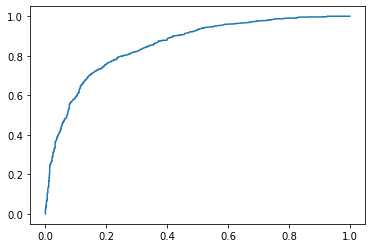

In [70]:
plt.plot( fpr, tpr )

In [71]:
from sklearn.metrics import roc_auc_score

In [72]:
roc_auc_score(y_test, predictions[:, 1])

0.8543586783004967

In [77]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [78]:
predictions = model.predict_proba( X_test )
predictions[:3]

array([[0.15790283, 0.84209717],
       [0.70802414, 0.29197586],
       [0.32930805, 0.67069195]])

In [79]:
tp, fp, tn, fn

(915, 235, 769, 253)

In [80]:
tpr = tp/(tp + fn)
tpr

0.7833904109589042

In [81]:
fpr = fp/(fp + tn)
fpr

0.2340637450199203

In [86]:
tpr_list = [] 
fpr_list = []

for i in np.sort(predictions[:, 1]):
  tp = 0 # True positive
  fp = 0 # False positive
  fn = 0 # False negative
  tn = 0 # True negative
  #predictions = model.predict_proba( X_test )
  for predicted_prob, actual in zip( predictions[:, 1], y_test ):    
      if predicted_prob >= i:
          predicted = 1
      else:
          predicted = 0
      
      if predicted == 1:
          if actual == 1:
              tp += 1
          else:
              fp += 1
      
      else:
          if actual == 1:
              fn += 1
          else:
              tn += 1
  tpr = tp/(tp + fn)
  fpr = fp / (fp + tn)
  tpr_list.append(tpr) 
  fpr_list.append(fpr) 
  print((tp, fp, tn, fn)[0:20])

(1168, 1004, 0, 0)
(1168, 1003, 1, 0)
(1168, 1002, 2, 0)
(1168, 1001, 3, 0)
(1168, 1000, 4, 0)
(1168, 999, 5, 0)
(1168, 998, 6, 0)
(1168, 997, 7, 0)
(1168, 996, 8, 0)
(1168, 995, 9, 0)
(1168, 994, 10, 0)
(1168, 993, 11, 0)
(1168, 992, 12, 0)
(1168, 991, 13, 0)
(1168, 990, 14, 0)
(1168, 989, 15, 0)
(1168, 988, 16, 0)
(1168, 987, 17, 0)
(1168, 986, 18, 0)
(1168, 985, 19, 0)
(1168, 984, 20, 0)
(1168, 983, 21, 0)
(1168, 982, 22, 0)
(1168, 982, 22, 0)
(1168, 982, 22, 0)
(1168, 979, 25, 0)
(1168, 978, 26, 0)
(1168, 977, 27, 0)
(1168, 976, 28, 0)
(1168, 975, 29, 0)
(1168, 975, 29, 0)
(1168, 975, 29, 0)
(1168, 972, 32, 0)
(1168, 971, 33, 0)
(1168, 970, 34, 0)
(1168, 969, 35, 0)
(1168, 968, 36, 0)
(1168, 967, 37, 0)
(1168, 966, 38, 0)
(1168, 966, 38, 0)
(1168, 964, 40, 0)
(1168, 963, 41, 0)
(1168, 962, 42, 0)
(1168, 961, 43, 0)
(1168, 960, 44, 0)
(1168, 959, 45, 0)
(1168, 958, 46, 0)
(1168, 957, 47, 0)
(1168, 957, 47, 0)
(1168, 955, 49, 0)
(1168, 954, 50, 0)
(1168, 953, 51, 0)
(1168, 952, 52, 0

(1123, 620, 384, 45)
(1123, 620, 384, 45)
(1122, 617, 387, 46)
(1122, 617, 387, 46)
(1122, 615, 389, 46)
(1122, 615, 389, 46)
(1122, 613, 391, 46)
(1122, 612, 392, 46)
(1122, 612, 392, 46)
(1122, 612, 392, 46)
(1122, 609, 395, 46)
(1122, 608, 396, 46)
(1122, 607, 397, 46)
(1122, 607, 397, 46)
(1122, 607, 397, 46)
(1122, 607, 397, 46)
(1122, 607, 397, 46)
(1121, 603, 401, 47)
(1121, 603, 401, 47)
(1121, 601, 403, 47)
(1121, 600, 404, 47)
(1121, 600, 404, 47)
(1121, 600, 404, 47)
(1121, 600, 404, 47)
(1121, 600, 404, 47)
(1121, 600, 404, 47)
(1121, 594, 410, 47)
(1121, 594, 410, 47)
(1120, 593, 411, 48)
(1120, 592, 412, 48)
(1120, 592, 412, 48)
(1119, 591, 413, 49)
(1119, 591, 413, 49)
(1119, 591, 413, 49)
(1118, 589, 415, 50)
(1118, 589, 415, 50)
(1118, 589, 415, 50)
(1118, 589, 415, 50)
(1117, 586, 418, 51)
(1117, 586, 418, 51)
(1117, 586, 418, 51)
(1117, 586, 418, 51)
(1117, 586, 418, 51)
(1117, 586, 418, 51)
(1117, 586, 418, 51)
(1117, 586, 418, 51)
(1114, 581, 423, 54)
(1114, 580, 4

(982, 327, 677, 186)
(982, 326, 678, 186)
(982, 326, 678, 186)
(982, 326, 678, 186)
(982, 326, 678, 186)
(982, 326, 678, 186)
(982, 326, 678, 186)
(982, 326, 678, 186)
(979, 322, 682, 189)
(979, 322, 682, 189)
(979, 322, 682, 189)
(977, 321, 683, 191)
(976, 321, 683, 192)
(975, 321, 683, 193)
(975, 320, 684, 193)
(975, 320, 684, 193)
(975, 320, 684, 193)
(974, 318, 686, 194)
(974, 317, 687, 194)
(974, 316, 688, 194)
(974, 316, 688, 194)
(973, 315, 689, 195)
(973, 314, 690, 195)
(973, 314, 690, 195)
(971, 314, 690, 197)
(971, 314, 690, 197)
(971, 314, 690, 197)
(970, 312, 692, 198)
(970, 312, 692, 198)
(969, 311, 693, 199)
(969, 311, 693, 199)
(969, 311, 693, 199)
(967, 310, 694, 201)
(967, 310, 694, 201)
(967, 310, 694, 201)
(966, 308, 696, 202)
(966, 307, 697, 202)
(966, 307, 697, 202)
(965, 306, 698, 203)
(964, 306, 698, 204)
(963, 306, 698, 205)
(963, 306, 698, 205)
(963, 306, 698, 205)
(961, 305, 699, 207)
(960, 305, 699, 208)
(960, 304, 700, 208)
(960, 303, 701, 208)
(960, 303, 70

(768, 123, 881, 400)
(768, 122, 882, 400)
(768, 122, 882, 400)
(766, 122, 882, 402)
(765, 122, 882, 403)
(765, 121, 883, 403)
(764, 121, 883, 404)
(764, 121, 883, 404)
(764, 121, 883, 404)
(764, 121, 883, 404)
(762, 119, 885, 406)
(762, 119, 885, 406)
(761, 118, 886, 407)
(760, 118, 886, 408)
(759, 118, 886, 409)
(758, 118, 886, 410)
(758, 117, 887, 410)
(757, 117, 887, 411)
(757, 117, 887, 411)
(757, 117, 887, 411)
(757, 117, 887, 411)
(757, 117, 887, 411)
(754, 115, 889, 414)
(753, 115, 889, 415)
(753, 115, 889, 415)
(751, 115, 889, 417)
(750, 115, 889, 418)
(749, 115, 889, 419)
(748, 115, 889, 420)
(748, 115, 889, 420)
(746, 115, 889, 422)
(745, 115, 889, 423)
(744, 115, 889, 424)
(744, 115, 889, 424)
(743, 114, 890, 425)
(743, 114, 890, 425)
(743, 114, 890, 425)
(740, 114, 890, 428)
(739, 114, 890, 429)
(739, 113, 891, 429)
(739, 113, 891, 429)
(739, 113, 891, 429)
(739, 113, 891, 429)
(739, 113, 891, 429)
(739, 113, 891, 429)
(739, 113, 891, 429)
(739, 113, 891, 429)
(739, 113, 89

(445, 37, 967, 723)
(445, 37, 967, 723)
(443, 37, 967, 725)
(443, 37, 967, 725)
(443, 37, 967, 725)
(440, 37, 967, 728)
(440, 37, 967, 728)
(440, 37, 967, 728)
(438, 36, 968, 730)
(438, 36, 968, 730)
(436, 36, 968, 732)
(435, 36, 968, 733)
(435, 36, 968, 733)
(435, 36, 968, 733)
(435, 36, 968, 733)
(432, 35, 969, 736)
(431, 35, 969, 737)
(430, 35, 969, 738)
(429, 35, 969, 739)
(429, 35, 969, 739)
(428, 34, 970, 740)
(428, 33, 971, 740)
(427, 33, 971, 741)
(426, 33, 971, 742)
(425, 33, 971, 743)
(425, 32, 972, 743)
(424, 32, 972, 744)
(424, 32, 972, 744)
(422, 32, 972, 746)
(421, 32, 972, 747)
(420, 32, 972, 748)
(419, 32, 972, 749)
(418, 32, 972, 750)
(418, 32, 972, 750)
(416, 32, 972, 752)
(416, 32, 972, 752)
(416, 32, 972, 752)
(413, 32, 972, 755)
(413, 32, 972, 755)
(413, 32, 972, 755)
(410, 32, 972, 758)
(409, 32, 972, 759)
(408, 32, 972, 760)
(407, 32, 972, 761)
(407, 32, 972, 761)
(407, 32, 972, 761)
(404, 32, 972, 764)
(404, 32, 972, 764)
(402, 32, 972, 766)
(402, 32, 972, 766)


In [88]:
tpr_list

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9991438356164384,
 0.9991438356164384,
 0.9982876712328768,
 0.997431506849315,
 0.997431506849315,
 0.997431506849315,
 0.997431506849315,
 0.997431506849315,
 0.997431506849315,
 0.997431506849315,
 0.997431506849315,
 0.997431506849315,
 0.997431506849315,
 0.997431506849315,
 0.997431506849315,
 0.997431506849315,
 0.9965753424657534,
 0.9965753424657534,
 0.9965753424657534,
 0.9965753424657534,
 0.9965753424657534,
 0.9965753424657534,
 0.9965753424657534,
 0.9965753424657534,
 0.9965753424657534,
 0.9965753424657534,
 0.99657534

In [89]:
fpr_list

[1.0,
 0.999003984063745,
 0.99800796812749,
 0.9970119521912351,
 0.9960159362549801,
 0.9950199203187251,
 0.9940239043824701,
 0.9930278884462151,
 0.9920318725099602,
 0.9910358565737052,
 0.9900398406374502,
 0.9890438247011952,
 0.9880478087649402,
 0.9870517928286853,
 0.9860557768924303,
 0.9850597609561753,
 0.9840637450199203,
 0.9830677290836654,
 0.9820717131474104,
 0.9810756972111554,
 0.9800796812749004,
 0.9790836653386454,
 0.9780876494023905,
 0.9780876494023905,
 0.9780876494023905,
 0.9750996015936255,
 0.9741035856573705,
 0.9731075697211156,
 0.9721115537848606,
 0.9711155378486056,
 0.9711155378486056,
 0.9711155378486056,
 0.9681274900398407,
 0.9671314741035857,
 0.9661354581673307,
 0.9651394422310757,
 0.9641434262948207,
 0.9631474103585658,
 0.9621513944223108,
 0.9621513944223108,
 0.9601593625498008,
 0.9591633466135459,
 0.9581673306772909,
 0.9571713147410359,
 0.9561752988047809,
 0.9551792828685259,
 0.954183266932271,
 0.953187250996016,
 0.953187250

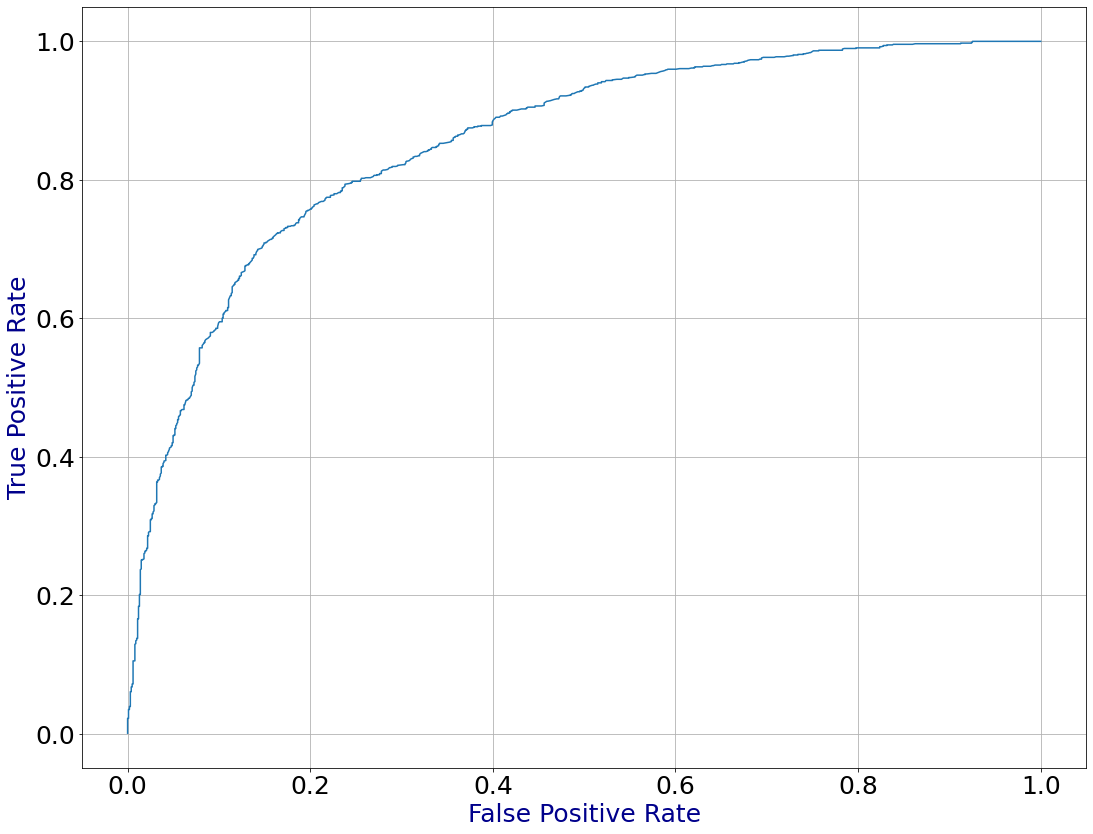

In [90]:
plt.figure(figsize=(18,14))
plt.plot( fpr_list, tpr_list )
plt.tick_params(axis='both', labelsize=25)
plt.xlabel('False Positive Rate', fontsize=25, color='darkblue')
plt.ylabel('True Positive Rate', fontsize=25, color='darkblue')
plt.grid()

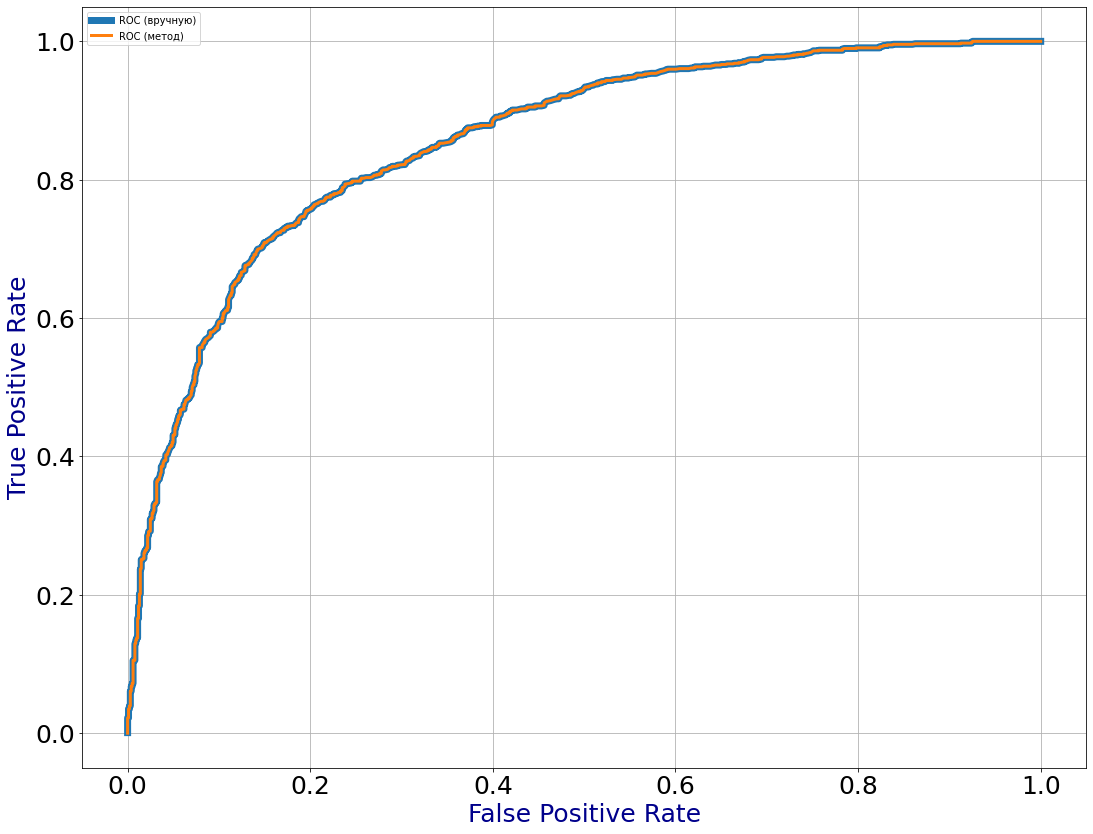

In [91]:
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1] )
plt.figure(figsize=(18,14))
plt.plot(fpr_list, tpr_list, linewidth=7 )
plt.plot( fpr, tpr, linewidth=3 )
plt.tick_params(axis='both', labelsize=25)
plt.xlabel('False Positive Rate', fontsize=25, color='darkblue')
plt.ylabel('True Positive Rate', fontsize=25, color='darkblue')
plt.grid()
plt.legend (('ROC (вручную)', 'ROC (метод)'))

In [93]:
pr = tp/(tp+fp)
pr

1.0

In [94]:
re = tp/(tp+fn)
re

0.0008561643835616438

In [95]:
pr, re, thres = precision_recall_curve(y_test, predictions[:, 1])

In [96]:
pr.shape, thres.shape

((1265,), (1264,))

In [98]:
for line in zip ( pr[:20], re[:20], thres[:20]):
  print(line)

(0.5569861707200763, 1.0, 0.06601558857009877)
(0.5567748091603053, 0.9991438356164384, 0.06686025675803486)
(0.556829035339064, 0.9982876712328768, 0.06688304675381897)
(0.5566172957477306, 0.997431506849315, 0.066992016256577)
(0.5571496891439502, 0.997431506849315, 0.06711980820132582)
(0.5574162679425837, 0.997431506849315, 0.06771494890201736)
(0.5579501915708812, 0.997431506849315, 0.0685797638266317)
(0.559021113243762, 0.997431506849315, 0.06963635050224731)
(0.5592894863178108, 0.997431506849315, 0.06981833914454129)
(0.5595581171950048, 0.997431506849315, 0.06990587139834392)
(0.5598270062469967, 0.997431506849315, 0.06995549102918314)
(0.5596153846153846, 0.9965753424657534, 0.07013825084084048)
(0.5598845598845599, 0.9965753424657534, 0.07070797990549071)
(0.5601539942252165, 0.9965753424657534, 0.07179482794087462)
(0.5604236880115552, 0.9965753424657534, 0.07198202113665905)
(0.5606936416184971, 0.9965753424657534, 0.07289707138092197)
(0.5609638554216867, 0.9965753424657

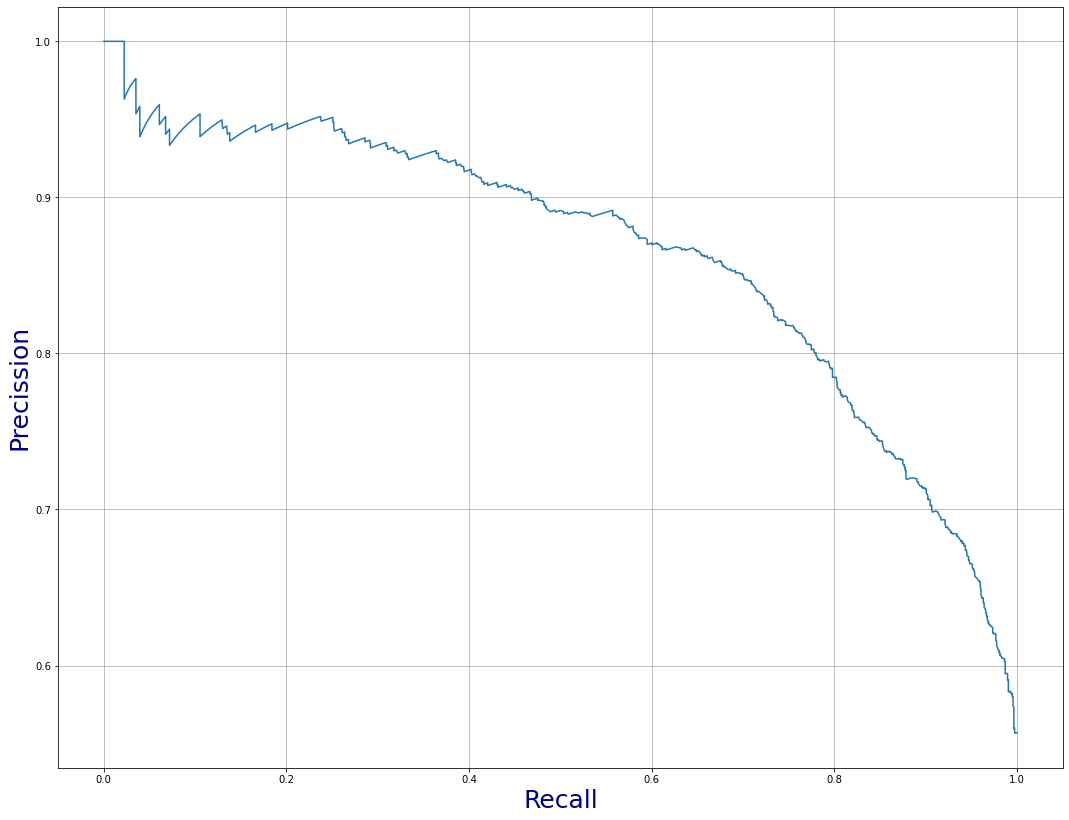

In [99]:
plt.figure(figsize=(18,14))
plt.xlabel('Recall', fontsize=25, color='darkblue')
plt.ylabel('Precission', fontsize=25, color='darkblue')
plt.plot(re, pr)
plt.grid()

In [100]:
prs_list = [] 
rcl_list = []

for i in np.sort(predictions[:, 1]):
  tp = 0 # True positive
  fp = 0 # False positive
  fn = 0 # False negative
  tn = 0 # True negative
  #predictions = model.predict_proba( X_test )
  for predicted_prob, actual in zip( predictions[:, 1], y_test ):    
      if predicted_prob >= i:
          predicted = 1
      else:
          predicted = 0
      
      if predicted == 1:
          if actual == 1:
              tp += 1
          else:
              fp += 1
      
      else:
          if actual == 1:
              fn += 1
          else:
              tn += 1
  prs = tp/(tp + fp) #precission
  rcl = tp / (tp + fn) #recall
  prs_list.append(prs) 
  rcl_list.append(rcl) 
  print(tp, fp, tn, fn)

1168 1004 0 0
1168 1003 1 0
1168 1002 2 0
1168 1001 3 0
1168 1000 4 0
1168 999 5 0
1168 998 6 0
1168 997 7 0
1168 996 8 0
1168 995 9 0
1168 994 10 0
1168 993 11 0
1168 992 12 0
1168 991 13 0
1168 990 14 0
1168 989 15 0
1168 988 16 0
1168 987 17 0
1168 986 18 0
1168 985 19 0
1168 984 20 0
1168 983 21 0
1168 982 22 0
1168 982 22 0
1168 982 22 0
1168 979 25 0
1168 978 26 0
1168 977 27 0
1168 976 28 0
1168 975 29 0
1168 975 29 0
1168 975 29 0
1168 972 32 0
1168 971 33 0
1168 970 34 0
1168 969 35 0
1168 968 36 0
1168 967 37 0
1168 966 38 0
1168 966 38 0
1168 964 40 0
1168 963 41 0
1168 962 42 0
1168 961 43 0
1168 960 44 0
1168 959 45 0
1168 958 46 0
1168 957 47 0
1168 957 47 0
1168 955 49 0
1168 954 50 0
1168 953 51 0
1168 952 52 0
1168 951 53 0
1168 951 53 0
1168 951 53 0
1168 951 53 0
1168 947 57 0
1168 946 58 0
1168 945 59 0
1168 944 60 0
1168 943 61 0
1168 942 62 0
1168 941 63 0
1168 940 64 0
1168 939 65 0
1168 938 66 0
1168 937 67 0
1168 936 68 0
1168 935 69 0
1168 934 70 0
1168 933 71

1104 538 466 64
1104 538 466 64
1104 538 466 64
1103 533 471 65
1102 533 471 66
1102 533 471 66
1102 531 473 66
1102 531 473 66
1102 529 475 66
1102 528 476 66
1102 528 476 66
1102 526 478 66
1102 526 478 66
1102 526 478 66
1100 525 479 68
1100 524 480 68
1100 523 481 68
1100 522 482 68
1100 521 483 68
1100 521 483 68
1098 521 483 70
1098 520 484 70
1098 519 485 70
1098 518 486 70
1098 517 487 70
1098 517 487 70
1096 517 487 72
1096 517 487 72
1096 515 489 72
1096 515 489 72
1096 515 489 72
1095 513 491 73
1095 513 491 73
1094 512 492 74
1094 511 493 74
1094 511 493 74
1094 511 493 74
1093 509 495 75
1093 509 495 75
1093 509 495 75
1092 507 497 76
1091 507 497 77
1091 507 497 77
1091 505 499 77
1091 505 499 77
1091 503 501 77
1090 503 501 78
1090 503 501 78
1089 502 502 79
1089 502 502 79
1089 502 502 79
1087 501 503 81
1086 501 503 82
1086 501 503 82
1085 500 504 83
1085 499 505 83
1084 499 505 84
1084 499 505 84
1084 497 507 84
1083 497 507 85
1083 497 507 85
1083 495 509 85
1083 495

864 188 816 304
864 188 816 304
862 188 816 306
862 187 817 306
862 186 818 306
862 186 818 306
861 185 819 307
861 185 819 307
861 185 819 307
861 185 819 307
858 184 820 310
858 183 821 310
857 183 821 311
857 183 821 311
857 183 821 311
857 180 824 311
857 180 824 311
856 179 825 312
856 179 825 312
856 177 827 312
856 176 828 312
855 176 828 313
854 176 828 314
854 175 829 314
854 174 830 314
853 174 830 315
853 174 830 315
853 174 830 315
852 172 832 316
852 172 832 316
852 172 832 316
849 172 832 319
849 171 833 319
849 170 834 319
849 170 834 319
849 170 834 319
849 170 834 319
847 168 836 321
846 168 836 322
845 168 836 323
845 167 837 323
845 166 838 323
845 165 839 323
844 165 839 324
844 164 840 324
844 164 840 324
844 164 840 324
842 163 841 326
842 163 841 326
842 163 841 326
842 163 841 326
842 163 841 326
842 163 841 326
842 163 841 326
838 160 844 330
838 160 844 330
836 160 844 332
836 159 845 332
835 159 845 333
835 159 845 333
834 158 846 334
834 157 847 334
834 157 

399 32 972 769
398 32 972 770
397 32 972 771
397 32 972 771
395 32 972 773
394 32 972 774
393 32 972 775
392 32 972 776
391 32 972 777
390 32 972 778
390 32 972 778
389 31 973 779
388 31 973 780
388 30 974 780
387 30 974 781
386 30 974 782
386 30 974 782
385 29 975 783
384 29 975 784
383 29 975 785
383 29 975 785
383 29 975 785
380 29 975 788
379 29 975 789
379 29 975 789
379 29 975 789
376 29 975 792
376 29 975 792
376 29 975 792
374 28 976 794
373 28 976 795
372 28 976 796
371 28 976 797
371 27 977 797
370 27 977 798
370 27 977 798
368 27 977 800
367 27 977 801
366 27 977 802
365 27 977 803
365 27 977 803
363 27 977 805
363 26 978 805
362 26 978 806
361 26 978 807
361 25 979 807
360 25 979 808
360 25 979 808
358 25 979 810
358 25 979 810
358 25 979 810
355 25 979 813
354 25 979 814
354 25 979 814
354 25 979 814
354 25 979 814
350 25 979 818
350 25 979 818
348 25 979 820
347 25 979 821
346 25 979 822
345 25 979 823
345 25 979 823
345 25 979 823
345 25 979 823
341 25 979 827
341 24 980

In [101]:
prs_list

[0.5377532228360957,
 0.5380009212344542,
 0.5382488479262673,
 0.5384970032272937,
 0.5387453874538746,
 0.5389940009229349,
 0.5392428439519852,
 0.5394919168591225,
 0.5397412199630314,
 0.5399907535829865,
 0.5402405180388529,
 0.5404905136510875,
 0.5407407407407407,
 0.5409911996294581,
 0.541241890639481,
 0.5414928140936486,
 0.5417439703153989,
 0.5419953596287703,
 0.542246982358403,
 0.5424988388295402,
 0.5427509293680297,
 0.5430032543003255,
 0.5432558139534883,
 0.5432558139534883,
 0.5432558139534883,
 0.544014904517932,
 0.5442684063373718,
 0.5445221445221445,
 0.5447761194029851,
 0.5450303313112459,
 0.5450303313112459,
 0.5450303313112459,
 0.5457943925233645,
 0.5460495558672277,
 0.5463049579045838,
 0.5465605989705195,
 0.5468164794007491,
 0.5470725995316159,
 0.5473289597000938,
 0.5473289597000938,
 0.5478424015009381,
 0.5480994838104176,
 0.5483568075117371,
 0.5486143729450447,
 0.5488721804511278,
 0.5491302303714152,
 0.5493885230479775,
 0.5496470588235

In [102]:
rcl_list

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9991438356164384,
 0.9991438356164384,
 0.9982876712328768,
 0.997431506849315,
 0.997431506849315,
 0.997431506849315,
 0.997431506849315,
 0.997431506849315,
 0.997431506849315,
 0.997431506849315,
 0.997431506849315,
 0.997431506849315,
 0.997431506849315,
 0.997431506849315,
 0.997431506849315,
 0.997431506849315,
 0.9965753424657534,
 0.9965753424657534,
 0.9965753424657534,
 0.9965753424657534,
 0.9965753424657534,
 0.9965753424657534,
 0.9965753424657534,
 0.9965753424657534,
 0.9965753424657534,
 0.9965753424657534,
 0.99657534

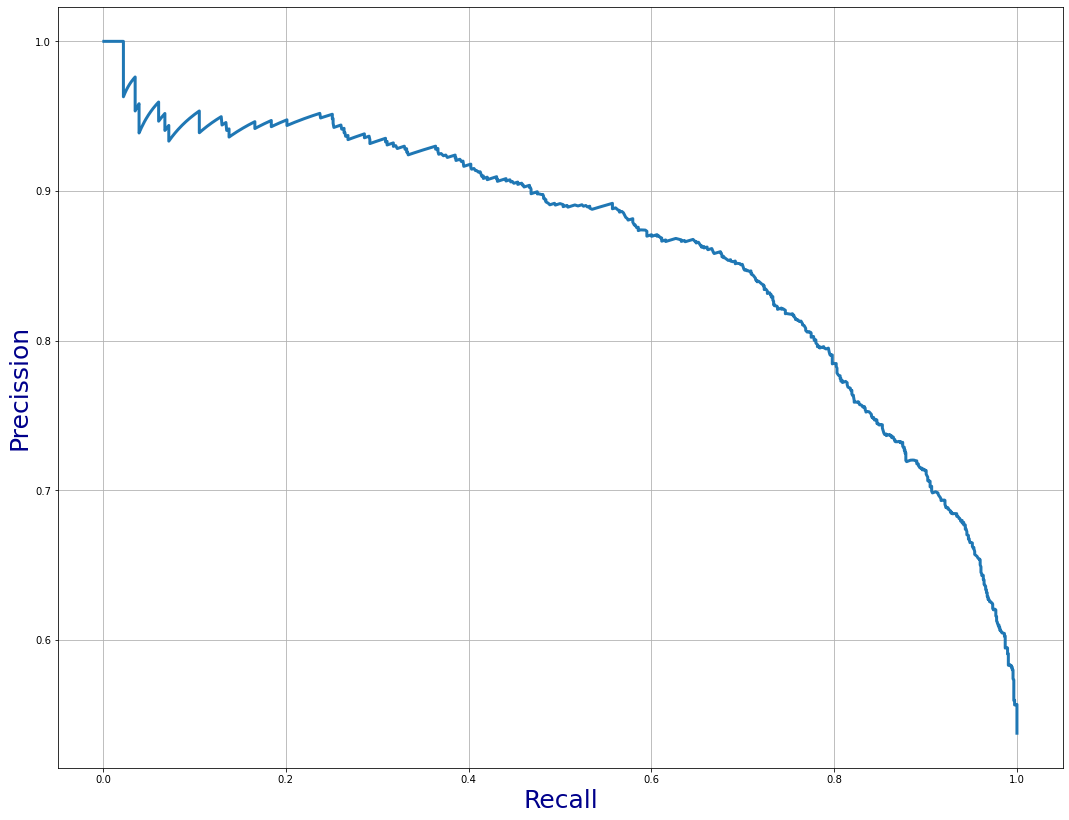

In [103]:
plt.figure(figsize=(18,14))
plt.plot(rcl_list, prs_list, linewidth=3 )
plt.xlabel('Recall', fontsize=25, color='darkblue')
plt.ylabel('Precission', fontsize=25, color='darkblue')
plt.grid()